# 0. Pima

## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도 
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

## 필요한 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 36.2 MB/s eta 0:00:00


In [3]:
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'

## 데이터셋 로드

In [4]:
df = pd.read_csv("http://bit.ly/data-diabetes-csv")
df.shape

(768, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 학습, 예측 데이터셋 나누기

In [6]:
split_count = int(df.shape[0] * 0.8)
split_count

614

In [7]:
train = df[:split_count]
test = df[split_count:]
train.shape, test.shape

((614, 9), (154, 9))

# 1. 기본 Decision Tree

- 트리 알고리즘 분석하기

## 학습, 예측에 사용할 컬럼

In [8]:
feature_names = df.columns.tolist()
feature_names.remove("Outcome")
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

### 정답값이자 예측해야 될 값

In [9]:
label_name = "Outcome"
label_name

'Outcome'

## 학습, 예측 데이터셋 만들기

In [10]:
X_train = train[feature_names]
display(X_train.head())
X_train.shape

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


(614, 8)

In [11]:
y_train = train[label_name]
display(y_train.head())
y_train.shape

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

(614,)

In [12]:
X_test = test[feature_names]
X_test.shape

(154, 8)

In [13]:
y_test = test[label_name]
y_test.shape

(154,)

## 머신러닝 알고리즘 가져오기

In [14]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=42)
model

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=42)

### 학습(훈련)

In [15]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=42)

### 예측


In [16]:
y_predict = model.predict(X_test)
y_predict

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

## 트리 알고리즘 분석하기
* 의사결정나무를 시각화 합니다.

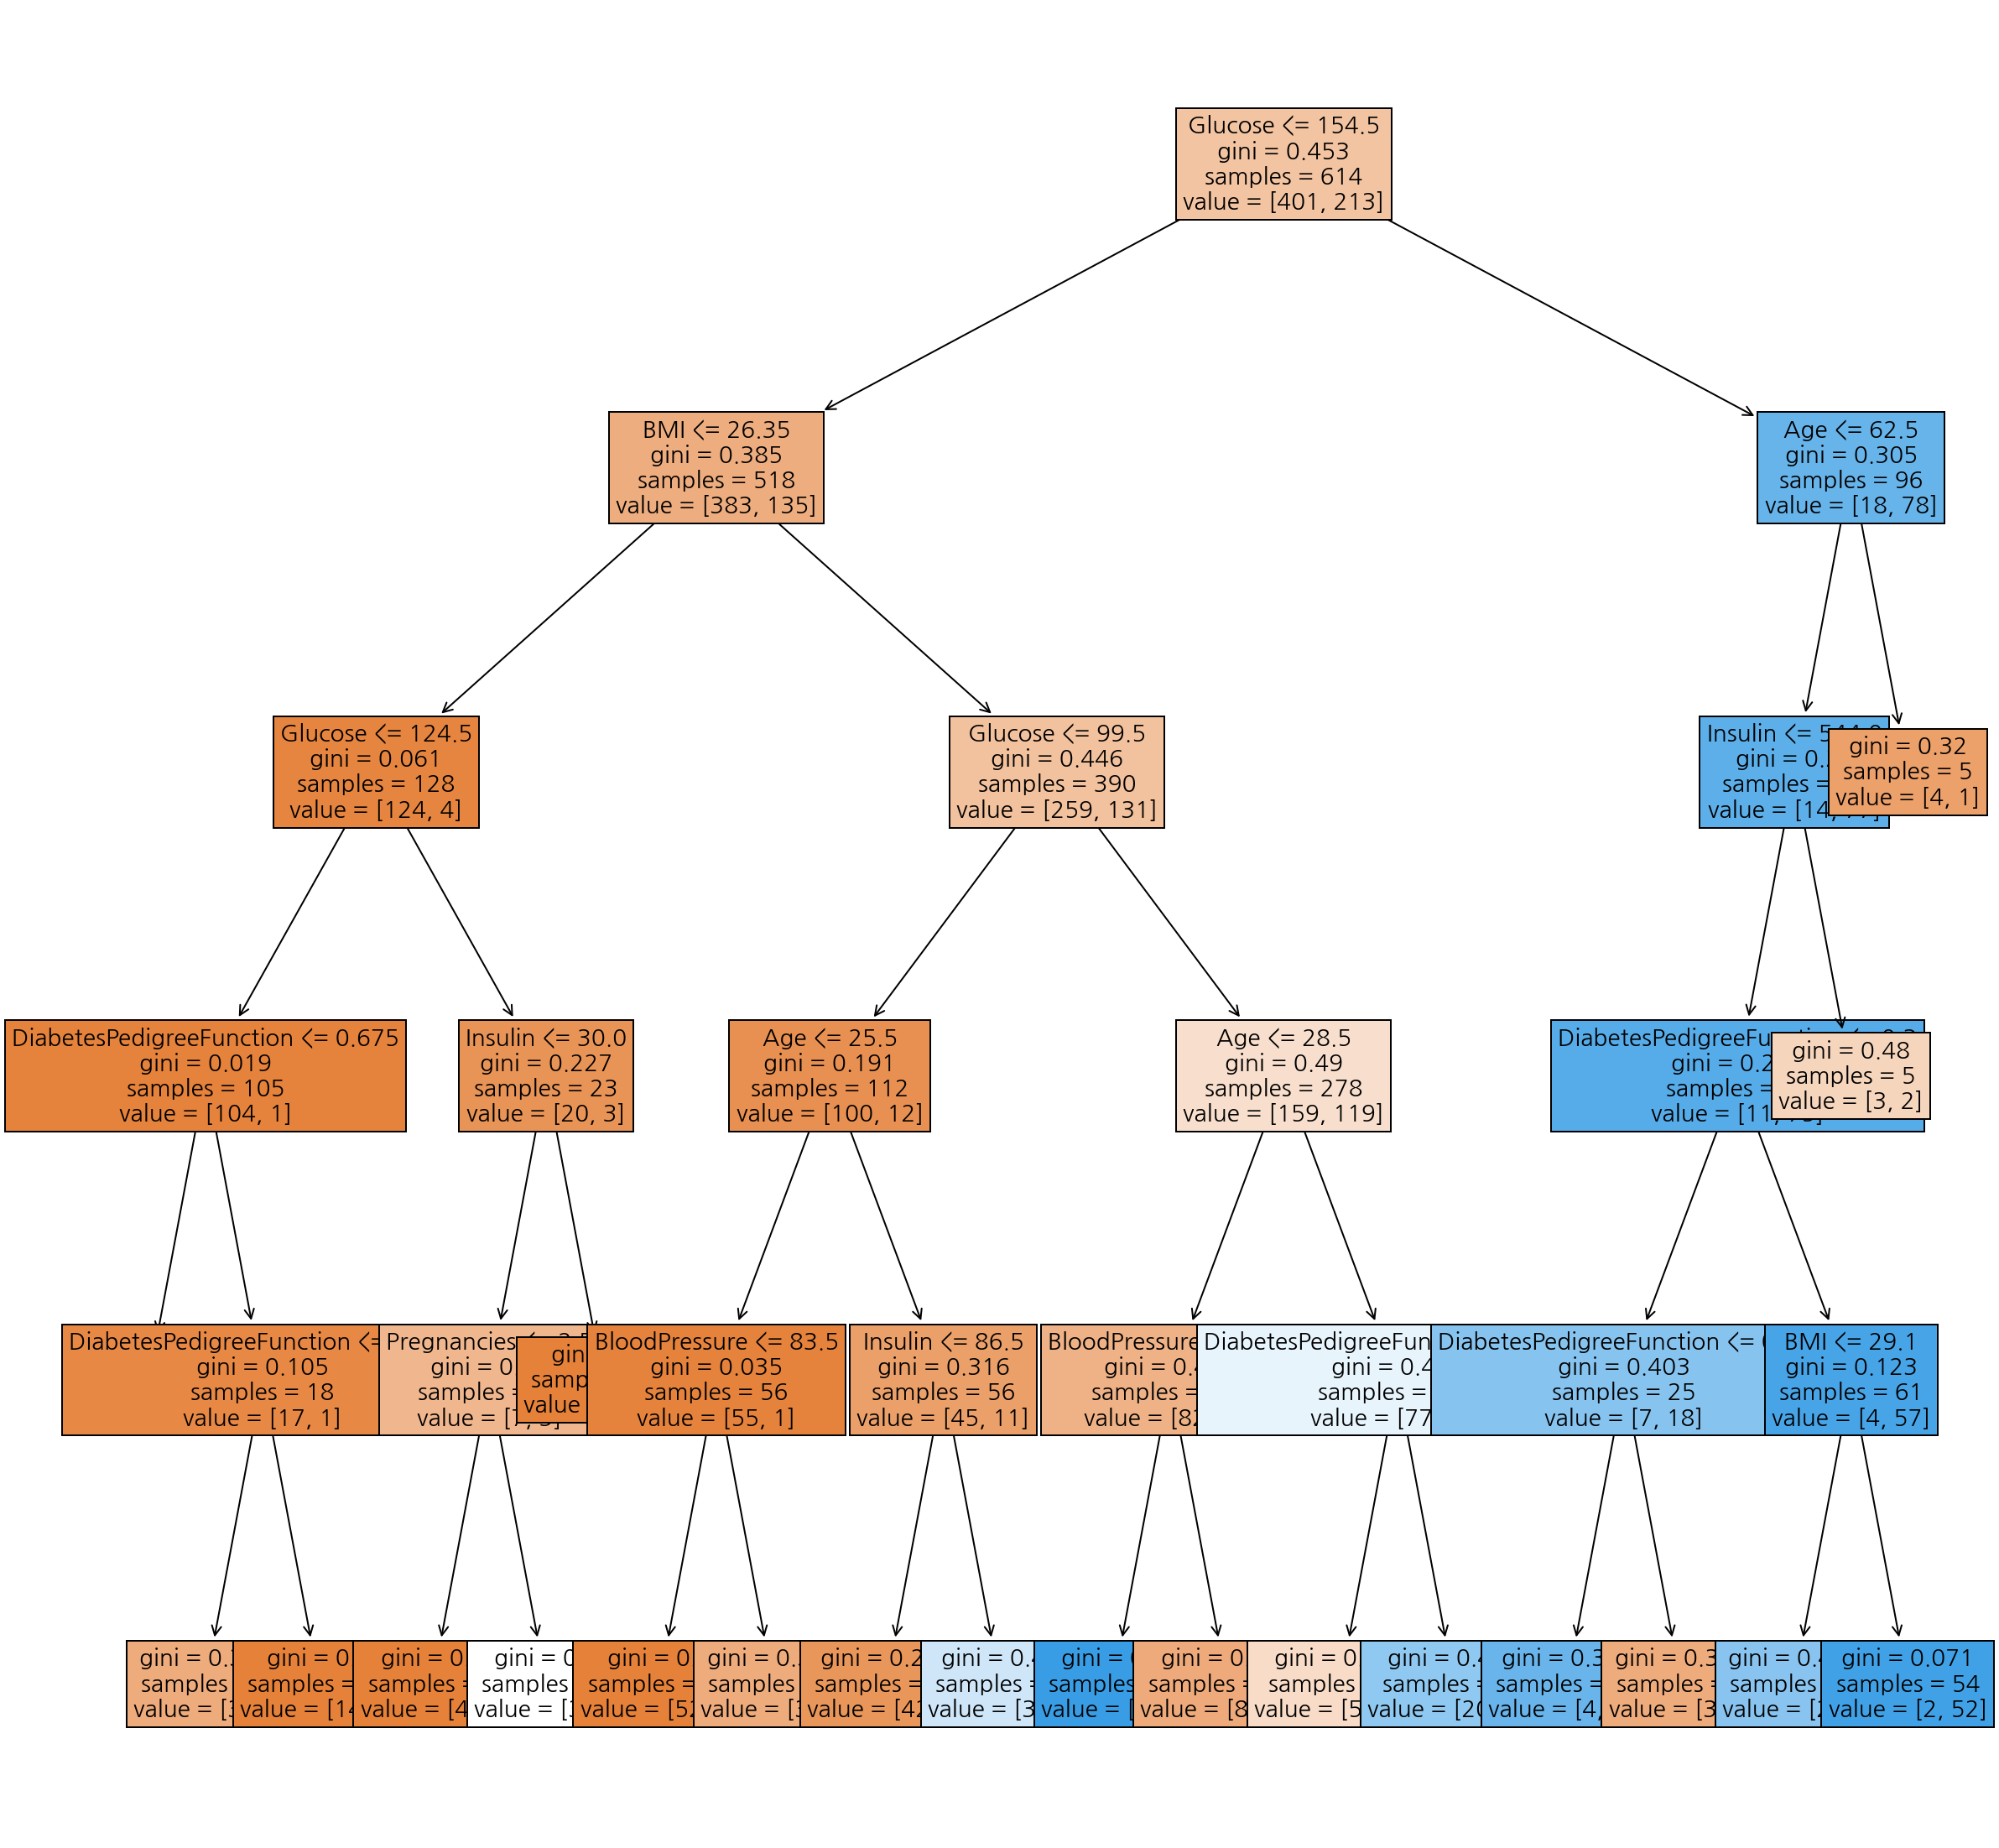

In [17]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
plot_tree(model, max_depth=6, 
          feature_names=feature_names, filled=True, fontsize=14)
plt.show()

In [18]:
model.feature_importances_

array([0.00984349, 0.54410465, 0.04819636, 0.        , 0.04407958,
       0.15302321, 0.08480049, 0.11595222])

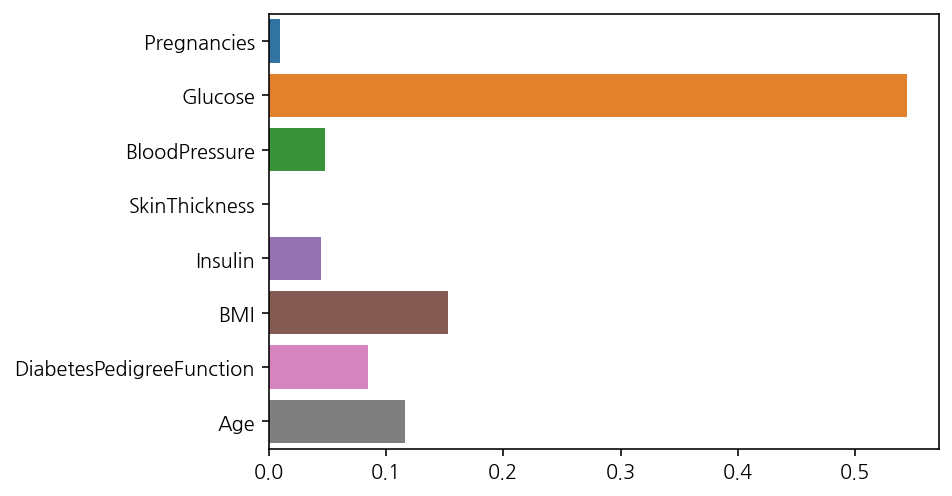

In [19]:
sns.barplot(x=model.feature_importances_, y=model.feature_names_in_)

## 정확도(Accuracy) 측정하기

In [20]:
# model 의 score 로 점수를 계산합니다.
model.score(X_test, y_test)

0.7792207792207793

# 2. Feature Engineering 해보기

- EDA
- RandomForest

## EDA

In [21]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


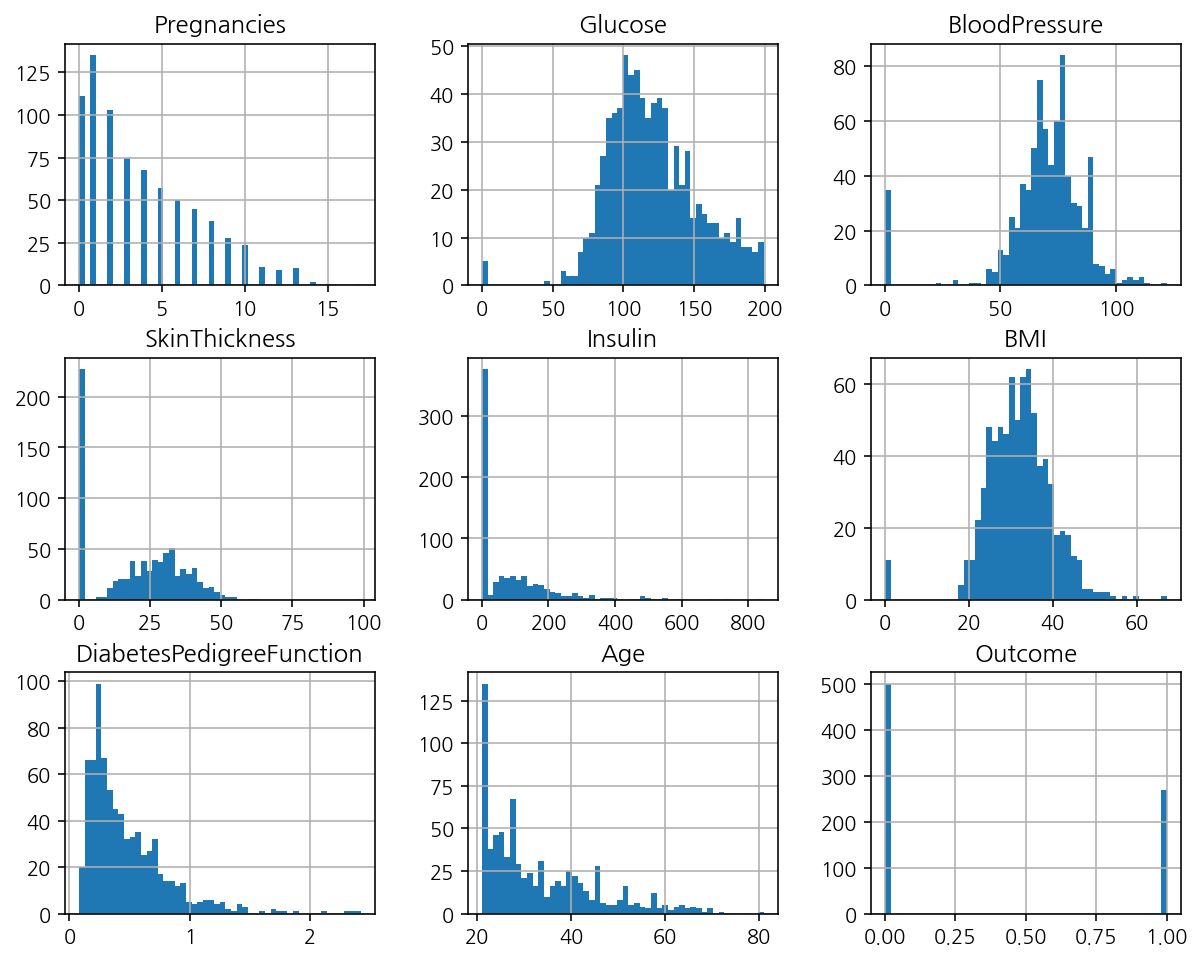

In [22]:
df.hist(figsize=(10, 8), bins=50);

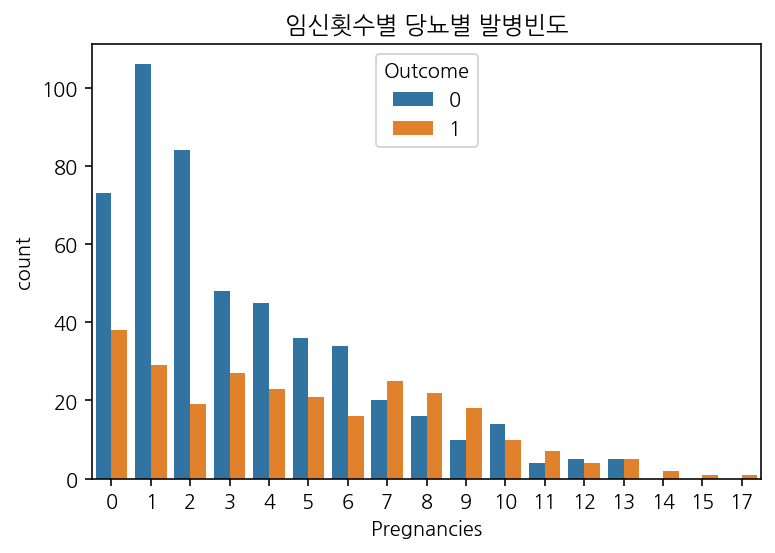

In [23]:
sns.countplot(data=df, x="Pregnancies", hue="Outcome")
plt.title("임신횟수별 당뇨별 발병빈도");

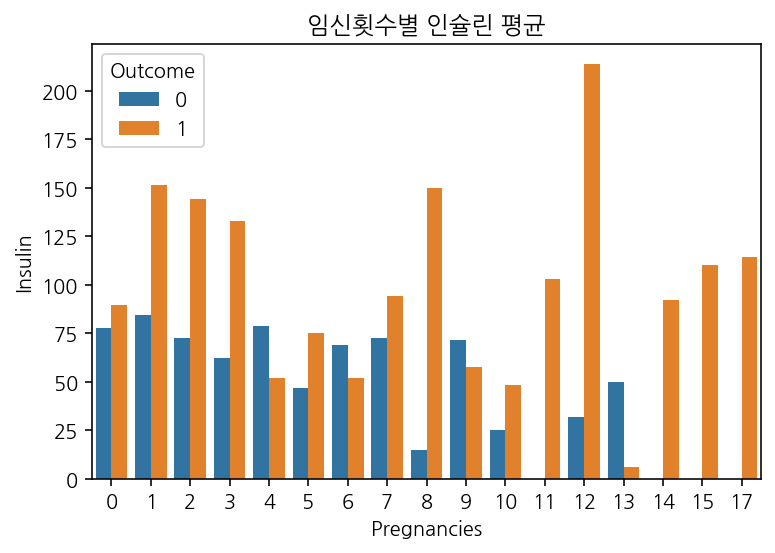

In [24]:
sns.barplot(data=df, x="Pregnancies", y="Insulin", hue="Outcome", ci=None)
plt.title("임신횟수별 인슐린 평균");

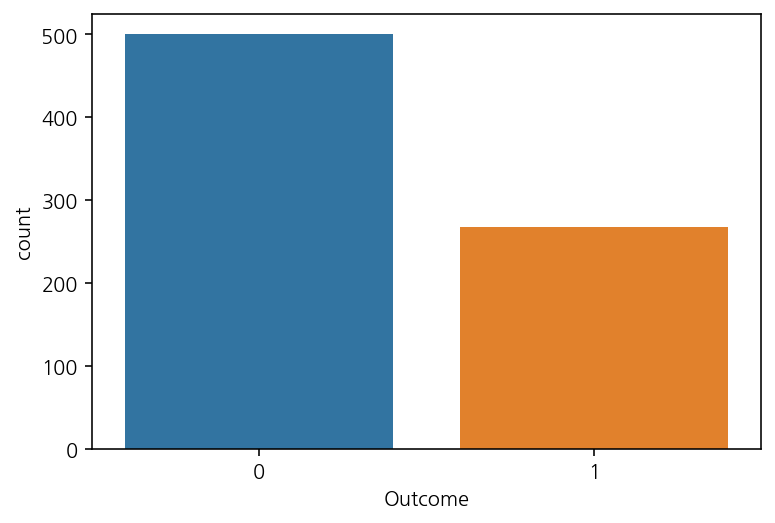

In [25]:
sns.countplot(data=df, x="Outcome");

## Feature Engineering

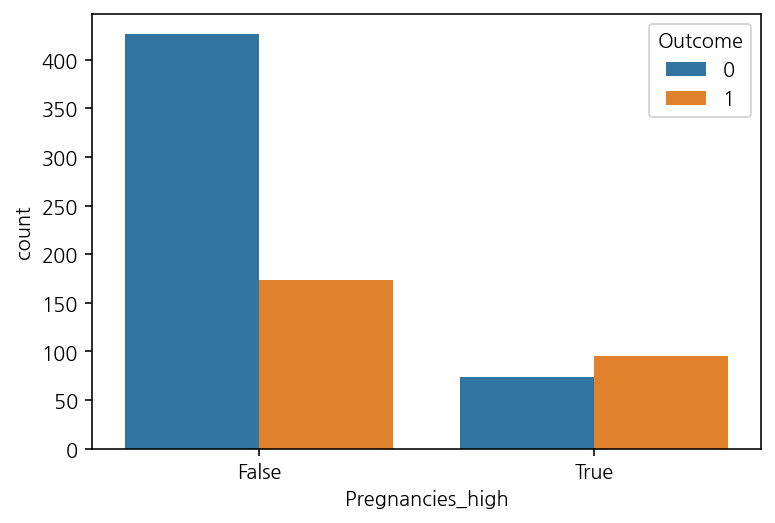

In [26]:
# Pregnancies_high 파생변수 만들기
# 임신횟수가 6보다 큰 값의 True, False 값을 파생변수로 만들기
df["Pregnancies_high"] = df["Pregnancies"] > 6

sns.countplot(data=df, x="Pregnancies_high", hue="Outcome");

### 결측치 다루기

In [27]:
# Insulin의 0 값을 결측치로 만들어 Insulin_nan 이라는 새로운 컬럼을 만들기
df["Insulin_nan"] = df["Insulin"].replace(0, np.nan)
df["Insulin_nan"].describe()

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin_nan, dtype: float64

In [28]:
# 결측치 수
df["Insulin_nan"].isnull().sum()

374

In [29]:
# 결측치 비율
df["Insulin_nan"].isnull().mean() * 100

48.69791666666667

In [30]:
# groupby 로 당뇨병 여부에 따라 평균, 중앙값 구하기
df.groupby("Outcome")[["Insulin", "Insulin_nan"]].describe()

Insulin                                                         \
          count        mean         std  min  25%   50%     75%    max   
Outcome                                                                  
0         500.0   68.792000   98.865289  0.0  0.0  39.0  105.00  744.0   
1         268.0  100.335821  138.689125  0.0  0.0   0.0  167.25  846.0   

        Insulin_nan                                                             
              count        mean         std   min    25%    50%     75%    max  
Outcome                                                                         
0             264.0  130.287879  102.482237  15.0   66.0  102.5  161.25  744.0  
1             130.0  206.846154  132.699898  14.0  127.5  169.5  239.25  846.0

In [31]:
Insulin_mean = df.groupby("Outcome")["Insulin_nan"].mean()
Insulin_mean

Outcome
0    130.287879
1    206.846154
Name: Insulin_nan, dtype: float64

In [32]:
# 결측치 채우기
df["Insulin_fill"] = df["Insulin_nan"]
df.loc[(df["Outcome"] == 0) & df["Insulin_nan"].isnull(), "Insulin_fill"] = Insulin_mean[0]
df.loc[(df["Outcome"] == 1) & df["Insulin_nan"].isnull(), "Insulin_fill"] = Insulin_mean[1]

In [33]:
df["Insulin_fill2"] = df["Insulin_nan"]
df.loc[df["Outcome"]==0, "Insulin_fill2"] = df.loc[df["Outcome"]==0, "Insulin_fill2"].fillna(Insulin_mean[0])
df["Insulin_fill2"] = df["Insulin_fill2"].fillna(Insulin_mean[1])

In [34]:
df[["Insulin", "Outcome", "Insulin_nan", "Insulin_fill"]].sample(5)

,Insulin,Outcome,Insulin_nan,Insulin_fill
186,495,1,495.0,495.000000
699,0,0,NaN,130.287879
53,300,1,300.0,300.000000
301,135,1,135.0,135.000000
201,0,0,NaN,130.287879


In [35]:
df[["Insulin", "Insulin_nan", "Insulin_fill", "Insulin_fill2"]].describe()

,Insulin,Insulin_nan,Insulin_fill,Insulin_fill2
count,768.000000,394.000000,768.000000,768.000000
mean,79.799479,155.548223,157.003527,157.003527
std,115.244002,118.775855,88.860914,88.860914
min,0.000000,14.000000,14.000000,14.000000
25%,0.000000,76.250000,121.500000,121.500000
50%,30.500000,125.000000,130.287879,130.287879
75%,127.250000,190.000000,206.846154,206.846154
max,846.000000,846.000000,846.000000,846.000000


### 이상치(outlier) 다루기

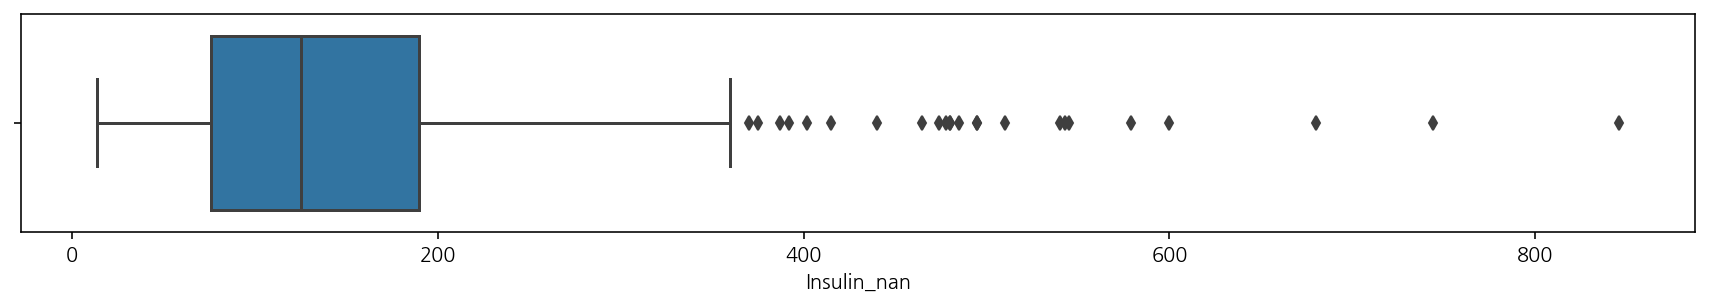

In [36]:
plt.figure(figsize=(15, 2))
sns.boxplot(data=df, x="Insulin_nan")

In [37]:
desc = df["Insulin_nan"].describe()
desc

count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin_nan, dtype: float64

In [38]:
df.shape

(768, 13)

In [39]:
IQR = desc["75%"] - desc["25%"]
max_out = desc["75%"] + (IQR * 1.5)
max_out

360.625

In [40]:
df = df[df["Insulin_fill"] < max_out]
df.shape

(744, 13)

## 학습, 예측 데이터셋 나누기

In [41]:
split_count = int(df.shape[0] * 0.8)
split_count

595

In [42]:
train = df[:split_count]
test = df[split_count:]

In [43]:
train.shape, test.shape

((595, 13), (149, 13))

## 정답값이자 예측해야 될 값

In [44]:
label_name = "Outcome"
label_name

'Outcome'

## 학습, 예측에 사용할 컬럼

In [45]:
feature_names = ['Glucose', 'BloodPressure', 
                 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 
                 'Age', 'Pregnancies_high', 'Insulin_fill']
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_fill']

## 학습, 예측 데이터셋 만들기

In [46]:
X_train = train[feature_names]
X_train.shape

(595, 8)

In [47]:
y_train = train[label_name]
y_train.shape

(595,)

In [48]:
X_test = test[feature_names]
X_test.shape

(149, 8)

In [49]:
y_test = test[label_name]
y_test.shape

(149,)

## 머신러닝 알고리즘 가져오기

In [50]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=3000, max_depth=6, 
                               min_samples_leaf=3, n_jobs=-1,
                               random_state=42)
model

RandomForestClassifier(max_depth=6, min_samples_leaf=3, n_estimators=3000,
                       n_jobs=-1, random_state=42)

## 학습(훈련)

In [51]:
X_train.shape

(595, 8)

In [52]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=3, n_estimators=3000,
                       n_jobs=-1, random_state=42)

## 예측

In [53]:
y_predict = model.predict(X_test)
y_predict

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0])

In [54]:
(y_test == y_predict).mean()

0.8926174496644296

#3. 하이퍼파라미터 튜닝

## GridSearchCV

In [55]:
# max_depth = [3, 5, 7, 9, 11]
max_depth = list(range(3, 20, 2))
max_depth

[3, 5, 7, 9, 11, 13, 15, 17, 19]

In [56]:
max_features = [0.3, 0.5, 0.7, 0.8, 0.9]
max_features

[0.3, 0.5, 0.7, 0.8, 0.9]

In [57]:
parameters = {"max_depth": max_depth, "max_features": max_features}
parameters

{'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 19],
 'max_features': [0.3, 0.5, 0.7, 0.8, 0.9]}

In [58]:
model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=42)
model

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=42)

In [59]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(model, parameters, n_jobs=-1, cv=5, scoring="accuracy", verbose=3)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, min_samples_leaf=4,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': [0.3, 0.5, 0.7, 0.8, 0.9]},
             scoring='accuracy', verbose=3)

In [60]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features=0.7, min_samples_leaf=4,
                       random_state=42)

In [61]:
clf.best_score_

0.877310924369748

## RandomizedSearchCV

In [62]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {"max_depth": np.random.randint(3, 25, 10), 
                       "max_features": np.random.uniform(0.8, 1, 10)}

clfr = RandomizedSearchCV(model, 
                          param_distributions=param_distributions, 
                          n_iter=15,
                          cv=5,
                          scoring="accuracy", 
                          n_jobs=-1,
                          random_state=42, verbose=1)
clfr.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(max_depth=5,
                                                    min_samples_leaf=4,
                                                    random_state=42),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': array([10,  5, 19, 13, 13, 11,  4,  3, 19,  9]),
                                        'max_features': array([0.98026195, 0.86263398, 0.80805967, 0.86221058, 0.85227508,
       0.92687092, 0.85931392, 0.9925727 , 0.97217601, 0.90654178])},
                   random_state=42, scoring='accuracy', verbose=1)

In [63]:
clfr.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features=0.9802619529677773,
                       min_samples_leaf=4, random_state=42)

In [64]:
clfr.best_params_

{'max_features': 0.9802619529677773, 'max_depth': 3}

In [65]:
clfr.best_score_

0.877310924369748

## Best Estimator

In [66]:
best_model = clfr.best_estimator_
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=0.9802619529677773,
                       min_samples_leaf=4, random_state=42)

In [67]:
y_predict = best_model.predict(X_test) 

In [68]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.87248322147651